In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYL9YXI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYL9YXI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteYL9YXI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [15]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [16]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [17]:
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [18]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [19]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 24s 18ms/step - loss: 0.6174 - accuracy: 0.6582 - val_loss: 0.4604 - val_accuracy: 0.8158
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.3507 - accuracy: 0.8500 - val_loss: 0.3534 - val_accuracy: 0.8403
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2613 - accuracy: 0.8957 - val_loss: 0.3629 - val_accuracy: 0.8392
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.2104 - accuracy: 0.9200 - val_loss: 0.3969 - val_accuracy: 0.8298
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 0.1631 - accuracy: 0.9402 - val_loss: 0.4479 - val_accuracy: 0.8278
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1272 - accuracy: 0.9540 - val_loss: 0.5490 - val_accuracy: 0.8262
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0873 - accuracy: 0.9703 - val_loss: 0.6936 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# **LSTM Model**

In [24]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 17s 19ms/step - loss: 0.5985 - accuracy: 0.6713 - val_loss: 0.4071 - val_accuracy: 0.8236
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 0.3432 - accuracy: 0.8552 - val_loss: 0.3531 - val_accuracy: 0.8435
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 0.2555 - accuracy: 0.9005 - val_loss: 0.3751 - val_accuracy: 0.8320
Epoch 4/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.4110 - val_accuracy: 0.8175
Epoch 5/50
782/782 [==============================] - 14s 17ms/step - loss: 0.1508 - accuracy: 0.9482 - val_loss: 0.4452 - val_accuracy: 0.8285
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1157 - accuracy: 0.9604 - val_loss: 0.5820 - val_accuracy: 0.8268
Epoch 7/50
782/782 [==============================] - 14s 19ms/step - loss: 0.0876 - accuracy: 0.9714 - val_loss: 0.5846 - val_accuracy:

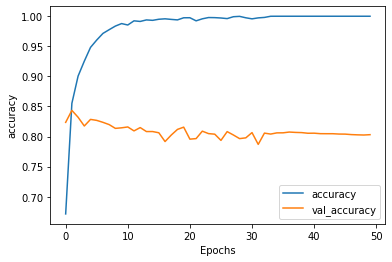

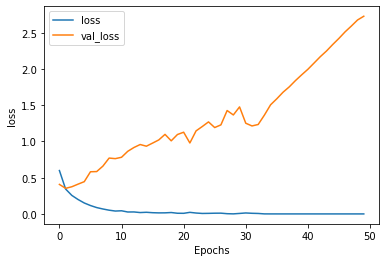

In [26]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# **model using convolutions**

In [27]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 32s 7ms/step - loss: 0.4460 - accuracy: 0.7866 - val_loss: 0.3484 - val_accuracy: 0.8490
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2788 - accuracy: 0.8866 - val_loss: 0.3540 - val_accuracy: 0.8484
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2268 - accuracy: 0.9118 - val_loss: 0.3897 - val_accuracy: 0.8340
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1899 - accuracy: 0.9298 - val_loss: 0.4225 - val_accuracy: 0.8331
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1588 - accuracy: 0.9425 - val_loss: 0.4610 - val_accuracy: 0.8279
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1292 - accuracy: 0.9557 - val_loss: 0.5257 - val_accuracy: 0.8227
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1034 - accuracy: 0.9662 - val_loss: 0.6231 - val_accuracy: 0.8112
Epoch

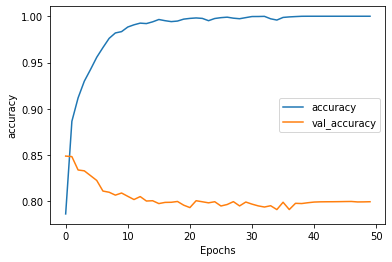

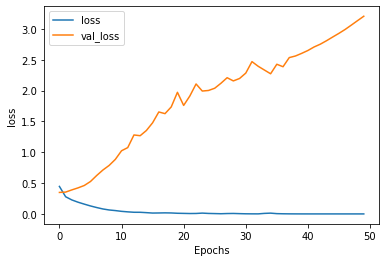

In [29]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')